<a href="https://colab.research.google.com/github/mildredymorales/conbio/blob/main/Copy_of_lobstercase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paper: DOI: 10.1111/eva.12992

This paper asks if MPA’s can conserve species’ mating patterns and secondary sexual traits, specifically in male european lobsters.

The paper found that Male lobsters have larger claws relative to their body inside MPAs compared to outside. Additionally, the size of claws increased faster relative to their increasing body size for males in MPAs compared to fishing areas.




2. Enumerate the question(s)/objective(s) that you aim to take on with clearly formatted Markdown.

Replication is a key component that's apart of publishing research and data analysis. Thus, I want to walkthrough this paper and teach them how to gather the steps of the analyses from the plot and the captions, so building intuiton.
I also want to go over the style and purpose of the visualization used to further get intuition of formatting visualizations and updates that can make it better. Lastly, I want to also make sure they understand the typical anlyses done in marine ecology, specifically for fishing/hunting data.

In the draft, I want to finish prompts of questions for each visualization for the class and also each figure. Right now I only replicate one and try my own. Plus just motivate and write more about the topic.

The first figure is as follows "Mean catch distribution of adult lobster in the marine protected areas (MPAs) and fished areas. Populations are from the
lobster MPAs (dark blue) and fished areas (red) of Aust-Agder, Vestfold and Østfold during the 13 years of protection (2006–2019). Catch-
per-unit-effort (CPUE) is shown for lobsters above the legal size limit of 250 mm total length (TL) from the annual research trap survey.
Implementation of the protected areas from September 2006 is indicated by vertical stippled line. Error bars depict one standard error
around the mean. Sex is separated with males in solid line and females in broken line."

Starting off, we are going to want to check for CPUE and separate by county, sex, and status over years after downloading the paper's data (https://datadryad.org/dataset/doi:10.5061/dryad.m37pvmczq)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import numpy as np
import geopandas as gpd
import zipfile
import os


In [3]:

# Load the research paper publicly available data
data_path = "/content/ClawData.txt"
df = pd.read_csv(data_path,  sep='\t', encoding='latin-1')

# Preview the data to ensure it loaded correctly
print("Data head:\n", df.head())

# check for any na TODO

Data head:
    Number  Year        Date      County        Area Status      Sex  \
0       1  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   
1       2  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   
2       3  2017  29/08/2017  Aust-Agder  Flodevigen    MPA  Females   
3       4  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   
4       5  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   

   TotalLength(TL)  CrusherClawWidth(CW)  CrusherLoss  SiccorLoss  ClawRatio  
0              345                    80            0           0   0.231884  
1              250                    48            0           0   0.192000  
2              272                    43            0           0   0.158088  
3              232                    43            0           0   0.185345  
4              315                    75            0           0   0.238095  


It is important to note that lobsters have a legal size for being caught and this analyses takes that into account, so we must filter the data.

In [4]:
# legal limit for lobsters is 250 mm
df_legal = df[df['TotalLength(TL)'] >= 250]
print(df_legal.head())

   Number  Year        Date      County        Area Status      Sex  \
0       1  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   
1       2  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   
2       3  2017  29/08/2017  Aust-Agder  Flodevigen    MPA  Females   
4       5  2017  29/08/2017  Aust-Agder  Flodevigen    MPA    Males   
5       6  2017  29/08/2017  Aust-Agder  Flodevigen    MPA  Females   

   TotalLength(TL)  CrusherClawWidth(CW)  CrusherLoss  SiccorLoss  ClawRatio  
0              345                    80            0           0   0.231884  
1              250                    48            0           0   0.192000  
2              272                    43            0           0   0.158088  
4              315                    75            0           0   0.238095  
5              253                    43            0           0   0.169960  


- CPUE is typically calculated as the number of organisms caught divided by the effort spent. Since the actual effort data is not available, we use the number of lobsters caught (indicated by the TotalLength(TL) column) as a proxy for effort. We then count the number of lobsters caught within each combination of County, Area, Status, Year, and Sex. This count is used as a surrogate measure for CPUE.

- We also want to groupby based on specific categories like County, Area, Status, Year, and Sex. This creates groups, and for each group, we count how many lobsters are caught.

- We then create a plot for each county. The x-axis is the year (Year), the y-axis is the estimated CPUE (which is the count of lobsters per year), and we differentiate the data by Sex and Status (e.g., male vs female lobsters and whether the area is an MPA or fished).
For each county, we generate a separate plot with different lines for the sexes (hue='Sex') and different line styles for the Status (style='Status').

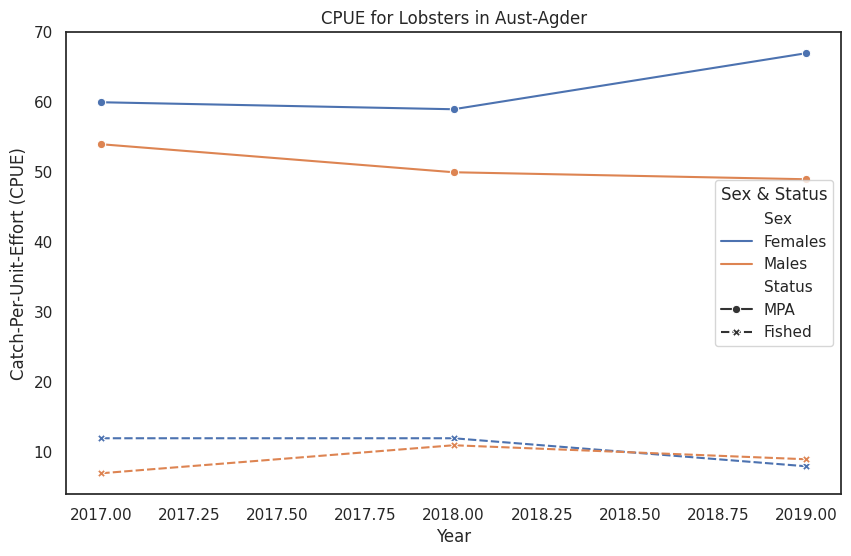

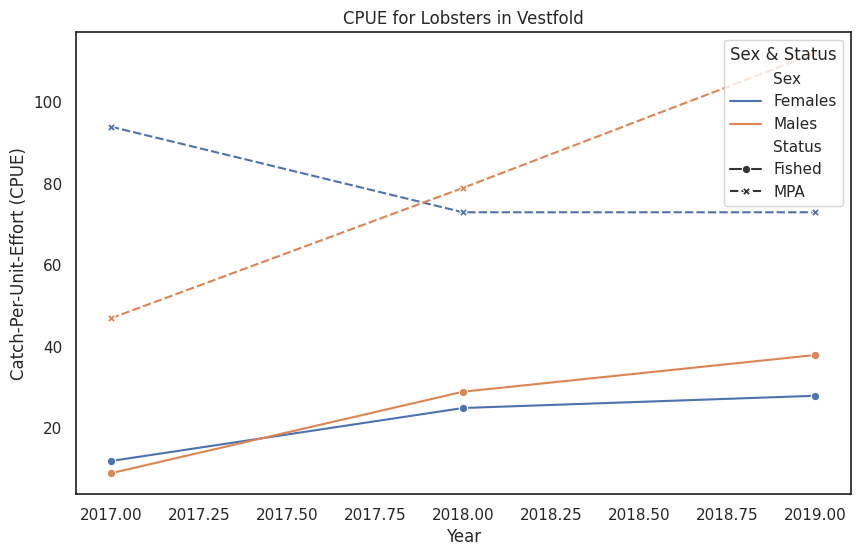

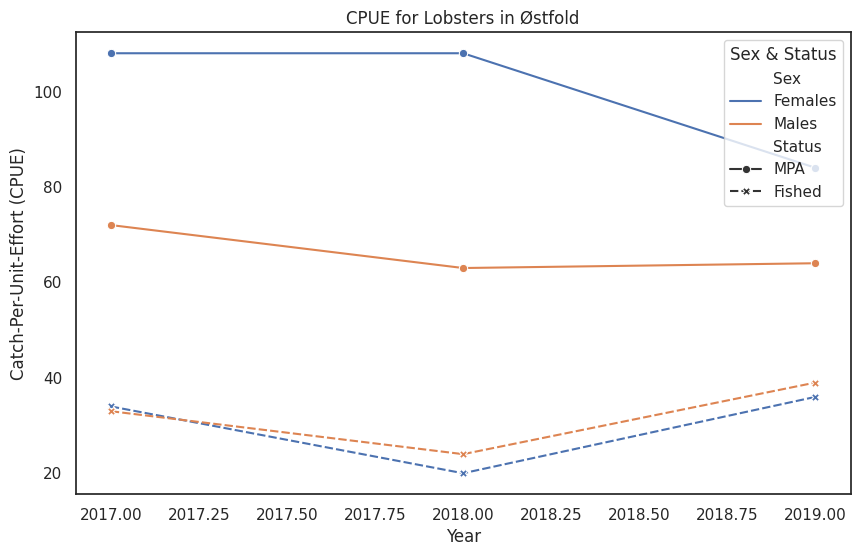

In [5]:
# figure 1, switch the hue and style. make y axis decimals, make x-axis whole numbers, make legend smaller, make error bars, no grid behind TODO better comments on why

# Calculate average CPUE by County, Area, Status, Year, and Sex
cpue_data = df_legal.groupby(['County', 'Area', 'Status', 'Year', 'Sex'])['TotalLength(TL)'].count().reset_index(name='CPUE')

# Create separate plots for each county
counties = cpue_data['County'].unique()

# Set up the plotting style, ask class is the aesthetic the best here?
sns.set(style="white")

for county in counties:
    county_data = cpue_data[cpue_data['County'] == county]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year', y='CPUE', hue='Sex', style='Status', data=county_data, markers=True)

    # Set plot labels and title
    plt.title(f'CPUE for Lobsters in {county}')
    plt.xlabel('Year')
    plt.ylabel('Catch-Per-Unit-Effort (CPUE)')

    # Display the plot
    plt.legend(title='Sex & Status')
    plt.show()



The paper has a map that shows where the counties they are focusing on, but the visual is pretty poor. I want to make a better visualization that overlays the data.

In [7]:
# load data in and extract for zip file
zip_path = '/content/no_shp.zip'
extract_path = '/content/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



In [8]:
# load the shapefile into a GeoDataFrame
shapefile_path = os.path.join(extract_path, "/content/data/no.shp")
gdf = gpd.read_file(shapefile_path)

print(gdf)

      id                  name                  source  \
0   NO54     Troms og Finnmark  https://simplemaps.com   
1   NO50            TrÃ¸ndelag  https://simplemaps.com   
2   NO30                 Viken  https://simplemaps.com   
3   NO03                  Oslo  https://simplemaps.com   
4   NO38  Vestfold og Telemark  https://simplemaps.com   
5   NO42                 Agder  https://simplemaps.com   
6   NO11              Rogaland  https://simplemaps.com   
7   NO46              Vestland  https://simplemaps.com   
8   NO15      MÃ¸re og Romsdal  https://simplemaps.com   
9   NO34             Innlandet  https://simplemaps.com   
10  NO18              Nordland  https://simplemaps.com   

                                             geometry  
0   MULTIPOLYGON (((18.18929 68.53842, 18.18864 68...  
1   MULTIPOLYGON (((14.33207 65.11396, 14.31068 65...  
2   MULTIPOLYGON (((11.87463 59.88494, 11.84959 59...  
3   POLYGON ((10.6801 60.15338, 10.73317 60.14429,...  
4   POLYGON ((7.46784 6

Apparently Norway changes its counties alot? Multiple counties have morphed into one or a new one, thus we need to map the new names onto the data to keep consistency.

In [9]:
# replace names to match in both df
gdf['County'] = gdf['name'].replace({
    "Agder": "Aust-Agder",
    "Vestfold og Telemark": "Vestfold",
    "Viken": "Østfold"
})

print(gdf.County)

0     Troms og Finnmark
1            TrÃ¸ndelag
2               Østfold
3                  Oslo
4              Vestfold
5            Aust-Agder
6              Rogaland
7              Vestland
8      MÃ¸re og Romsdal
9             Innlandet
10             Nordland
Name: County, dtype: object


In [10]:
# Filter the shapefile to only include the counties in df
counties_of_interest = df['County'].unique()
gdf_filtered = gdf[gdf['County'].isin(counties_of_interest)]
gdf_filtered.head()

,id,name,source,geometry,County
2,NO30,Viken,https://simplemaps.com,"MULTIPOLYGON (((11.87463 59.88494, 11.84959 59...",Østfold
4,NO38,Vestfold og Telemark,https://simplemaps.com,"POLYGON ((7.46784 60.1137, 7.62427 60.14568, 7...",Vestfold
5,NO42,Agder,https://simplemaps.com,"POLYGON ((7.24393 59.69103, 7.26724 59.67649, ...",Aust-Agder


In [11]:
# merge the df based on the counties
merged = gdf_filtered.merge(df, on="County", how="inner")

In [19]:
# check original crs
print("Norway shapefile CRS:", gdf_filtered.crs)
print("Merged GeoDataFrame CRS:", merged.crs)


Norway shapefile CRS: EPSG:4326
Merged GeoDataFrame CRS: EPSG:4326


In [24]:
# find best crs
projected_crs = merged.estimate_utm_crs()
print("Estimated UTM CRS:", projected_crs)

Estimated UTM CRS: EPSG:32632


In [25]:
# apply this CRS
gdf_filtered_proj = gdf_filtered.to_crs(projected_crs)
merged_proj = merged.to_crs(projected_crs)


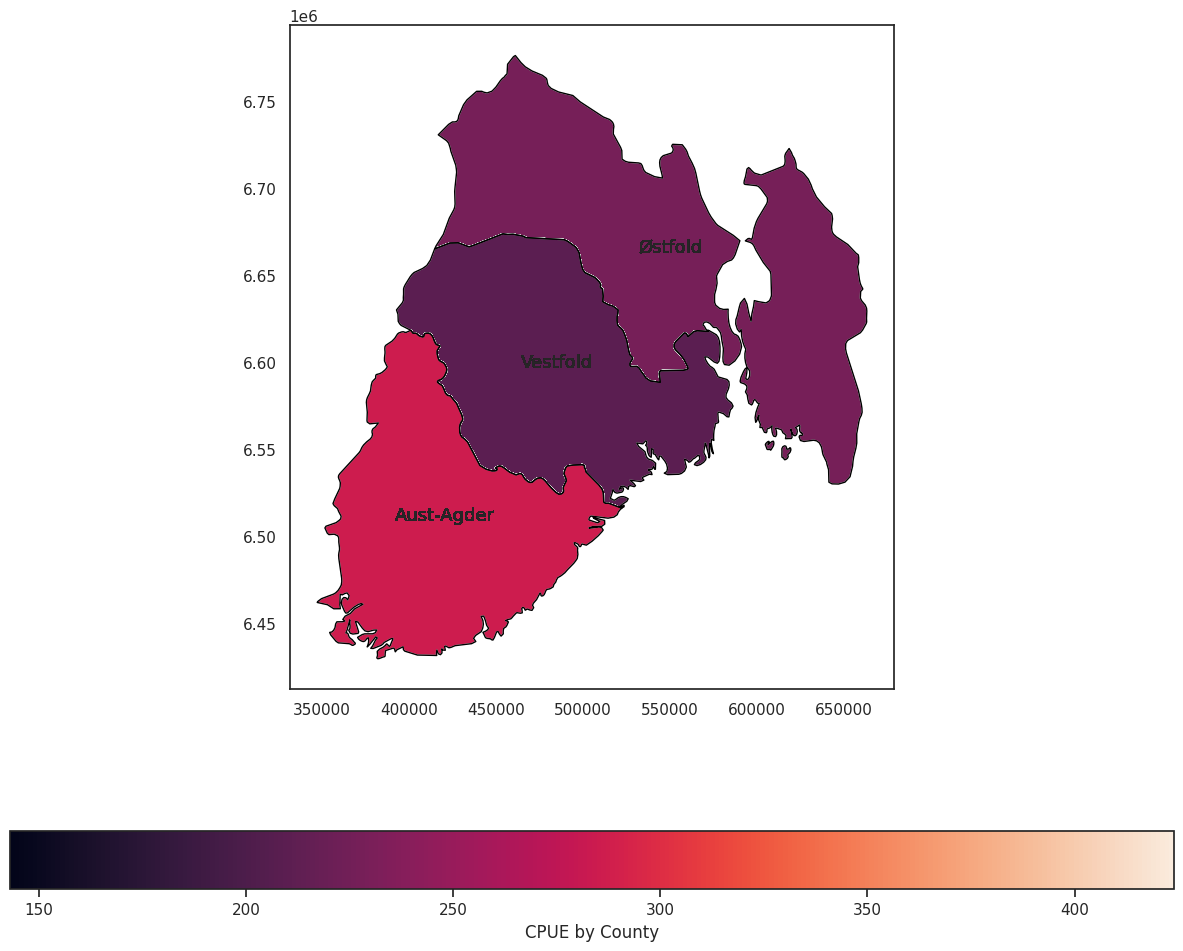

In [26]:
# recalculate centroids and plot
centroids = merged_proj.geometry.centroid

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_filtered_proj.boundary.plot(ax=ax, linewidth=1, color='black')
merged_proj.plot(column='TotalLength(TL)', ax=ax, legend=True,
                 legend_kwds={'label': "CPUE by County", 'orientation': "horizontal"})

for x, y, label in zip(centroids.x, centroids.y, merged_proj['County']):
    ax.text(x, y, label, fontsize=13, ha='center')

plt.tight_layout()
plt.show()

